<a href="https://colab.research.google.com/github/kushagr-17/ML-lab-eval/blob/main/lab_asgt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

In [2]:
import pandas as pd
import pycaret

In [3]:
df = pd.read_csv('Fuel_cell_performance_data-Full.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,Target2,Target3,Target4,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,0.959,1.531,79.3,4.19,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,0.728,1.690,57.2,5.19,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,0.784,1.865,61.6,7.77,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,0.884,1.920,71.3,8.40,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,0.736,1.711,58.5,4.75,52.32


In [17]:
# Roll number - 102203714
# Target Column - Target5

from pycaret.regression import *

data = df.drop(['Target1', 'Target2', 'Target3', 'Target4'], axis=1)
exp = setup(data = data, target = 'Target5', train_size = 0.7,
            normalize = True, normalize_method = 'robust',
            transformation = True, transformation_method = 'yeo-johnson',
            pca = True, pca_method = 'incremental',
            remove_outliers = True, outliers_threshold = 0.05,
            data_split_shuffle= True, session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target5
2,Target type,Regression
3,Original data shape,"(1000, 16)"
4,Transformed data shape,"(965, 16)"
5,Transformed train set shape,"(665, 16)"
6,Transformed test set shape,"(300, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [18]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,52.32


In [19]:
models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,17.8018,554.3460,23.4211,0.7242,0.5805,0.6032,0.2480
ridge,Ridge Regression,17.8209,554.3989,23.4252,0.7241,0.5818,0.6065,0.2500
lr,Linear Regression,17.8477,554.5605,23.4324,0.7238,0.5829,0.6106,0.4540
lar,Least Angle Regression,17.8477,554.5605,23.4324,0.7238,0.5829,0.6106,0.3520
huber,Huber Regressor,17.2809,579.6961,23.8593,0.7152,0.5338,0.5315,0.3910
lasso,Lasso Regression,17.7484,585.5763,23.9663,0.7123,0.4865,0.5291,0.2480
llar,Lasso Least Angle Regression,17.7484,585.5763,23.9663,0.7123,0.4865,0.5291,0.3910
par,Passive Aggressive Regressor,18.5397,655.3222,25.3747,0.6759,0.6010,0.5871,0.2500
lightgbm,Light Gradient Boosting Machine,18.5780,675.4526,25.7330,0.6672,0.4831,0.4783,1.6420
gbr,Gradient Boosting Regressor,19.0026,709.3642,26.4011,0.6498,0.4738,0.4874,0.8430


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [20]:
evaluate_model(models)

results = pull()
print(results)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

                                    Model      MAE        MSE     RMSE  \
br                         Bayesian Ridge  17.8018   554.3460  23.4211   
ridge                    Ridge Regression  17.8209   554.3989  23.4252   
lr                      Linear Regression  17.8477   554.5605  23.4324   
lar                Least Angle Regression  17.8477   554.5605  23.4324   
huber                     Huber Regressor  17.2809   579.6961  23.8593   
lasso                    Lasso Regression  17.7484   585.5763  23.9663   
llar         Lasso Least Angle Regression  17.7484   585.5763  23.9663   
par          Passive Aggressive Regressor  18.5397   655.3222  25.3747   
lightgbm  Light Gradient Boosting Machine  18.5780   675.4526  25.7330   
gbr           Gradient Boosting Regressor  19.0026   709.3642  26.4011   
et                  Extra Trees Regressor  20.6348   804.9641  28.0321   
xgboost         Extreme Gradient Boosting  21.2276   869.1753  29.1951   
rf                Random Forest Regres

In [21]:
predictions = predict_model(models)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,18.4832,578.0478,24.0426,0.6854,0.5339,0.5782


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target5,prediction_label
131,43.900002,1.95,29.700001,41.630001,75.459999,37.400002,0.334,246.899994,393,2.09,97.927002,2.50,9485,24.799999,270,101.290001,112.450619
203,82.900002,1.68,34.200001,43.810001,193.570007,42.200001,0.294,128.199997,368,0.66,101.723000,2.22,7495,29.000000,421,70.879997,88.654287
50,89.099998,2.62,63.799999,17.980000,182.639999,30.100000,0.259,366.000000,163,0.55,98.968002,1.65,7098,20.100000,954,69.889999,65.154117
585,43.799999,1.26,71.199997,23.719999,193.210007,27.100000,0.223,307.600006,257,0.87,98.070000,1.61,3065,28.299999,248,42.599998,54.815990
138,50.299999,1.95,44.000000,31.209999,148.520004,42.700001,0.294,294.799988,370,1.16,100.610001,1.96,7827,22.299999,321,74.669998,105.924293


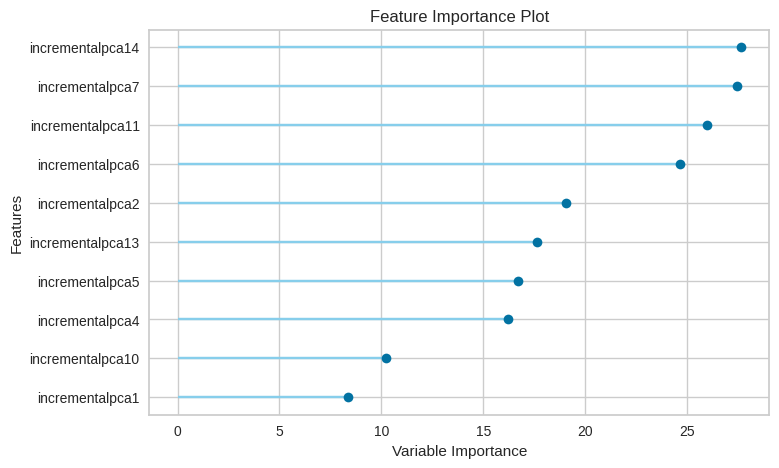

In [24]:
plot_model(models, plot = 'feature')

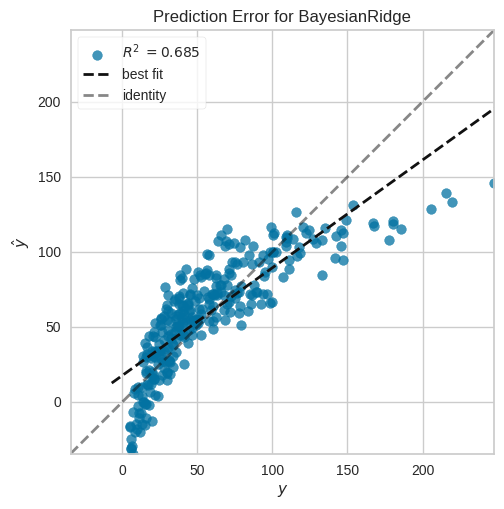

In [25]:
plot_model(models, plot = 'error')